# Лабораторная работа 3
## Проверка статистических гипотез

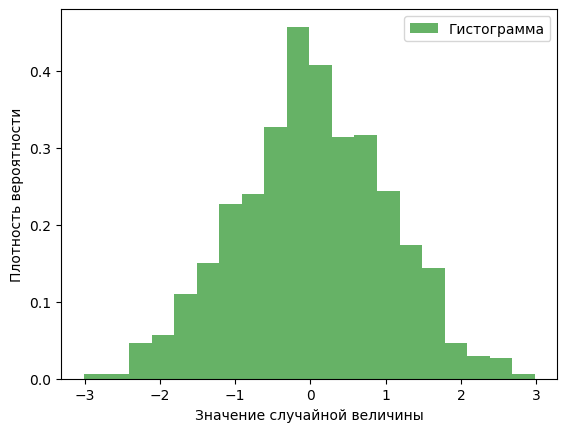

Хи-квадрат статистика: 4472.1075863838905
p-значение: 0.0
Степени свободы: 57
Ожидаемые частоты:
[[  3.49410997   5.68387882  20.29929506  30.04975696  54.94731901
   80.38438512 118.41912045 140.48489761 178.77988209 221.92354652
  541.31699834 514.19772217 422.15928321 317.71294623 231.57612236
  172.28377318 109.36159481  78.21898088  58.64250254  40.40448642]
 [  3.48481846   5.66876429  20.24531531  29.96984885  54.80120347
   80.1706275  118.10422113 140.11132112 178.30447183 221.33340892
  539.87753183 512.83037106 421.03668009 316.86808611 230.9603167
  171.82563733 109.0707812   78.01098149  58.48656079  40.29704308]
 [  3.35240395   5.45336523  19.47604326  28.83106851  52.71889289
   77.12434139 113.61655201 134.78743647 171.52934166 212.92328526
  519.36351714 493.34408177 405.03832466 304.82788034 222.18439429
  165.29668689 104.92636051  75.0467566   56.26421573  38.76585483]
 [  3.07173966   4.99680781  17.84550293  26.41732257  48.30525095
   70.66746778 104.10453929 12

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, kstest, norm, expon, lognorm

# Генерируем случайную величину (например, нормальное распределение)
mean = 0
std_dev = 1
sample_size = 1000
random_data = np.random.normal(mean, std_dev, sample_size)

# Построим гистограмму
plt.hist(random_data, bins=20, density=True, alpha=0.6, color='g', label='Гистограмма')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Создаем гистограмму с бинами и частотами
hist, bins = np.histogram(random_data, bins=20, density=True)
observed_frequencies = hist * sample_size

# Пересчитываем ожидаемые частоты
bins_centers = (bins[1:] + bins[:-1]) / 2
expected_normal = norm.pdf(bins_centers, mean, std_dev) * sample_size
expected_exponential = expon.pdf(bins_centers) * sample_size
expected_lognormal = lognorm.pdf(bins_centers, s=std_dev, scale=np.exp(mean)) * sample_size

# Создаем таблицу сопряженности
all_observed = np.array([observed_frequencies, expected_normal, expected_exponential, expected_lognormal])

# Выполняем критерий хи-квадрат
chi2, p, dof, expected = chi2_contingency(all_observed)

print(f'Хи-квадрат статистика: {chi2}')
print(f'p-значение: {p}')
print(f'Степени свободы: {dof}')
print('Ожидаемые частоты:')
print(expected)

# Задаем гипотезы как функции распределения (CDF)
cdf_normal = norm.cdf(random_data, mean, std_dev)
cdf_exponential = expon.cdf(random_data)
cdf_lognormal = lognorm.cdf(random_data, s=std_dev, scale=np.exp(mean))

# Проверяем гипотезы с использованием критерия Колмогорова-Смирнова
for i, cdf_hypothesis in enumerate([cdf_normal, cdf_exponential, cdf_lognormal]):
    ks_statistic, ks_p_value = kstest(random_data, cdf_hypothesis)
    print(f'Гипотеза {i+1}:')
    print(f'Колмогоров-Смирнов статистика: {ks_statistic}')
    print(f'p-значение: {ks_p_value}')
